In [2]:
%load_ext autoreload
%autoreload 2

import itertools
import pickle
from tqdm import tqdm

import numpy as np
import pandas as pd
import pycuber as pc

from classes.cube_classes import Cube3State, Cube3
from generate.generate_states import generate_symmetric_cubes, ids_to_color, states_to_color
from generate.generate_random_states import generate_random_states_and_generators
from generate.symmetry_config import actions

from utils.compressions import plot_histo

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

## 1. Try out generation on concrete patterns

In [4]:
nice_pattern = ["R", "B", "L" , "U", "F'", "L", "F", "L", "L", "B'", "R'", "U'", "F", "R'", "F'", "R"]
# nice_pattern = ["F", "F", "L'", "F", "F", "R'", "D'", "F", "B'", "R", "L'", "F'", "R", "R", "U'", "B'", "D'", "B'", "R", "R", "U"]
# nice_pattern = ["R'", "B", "U'", "B", "D", "D", "B'", "U", "F", "U", "R'", "L'", "B'", "L", "L", "D", "D", "F", "F"]
# nice_pattern = ["D'", "L", "U", "D", "R", "R", "U", "U", "F'", "D", "D", "L", "U'", "D'", "R", "R", "U", "U", "B'", "D'"]

In [5]:
pattern_generated_states, pattern_state_classes_list, pattern_state2gen_dict = generate_symmetric_cubes([nice_pattern])

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


In [6]:
orig_cube = pc.Cube()
half = int(len(pattern_generated_states[0]) // 2)
print(len(pattern_generated_states[0]))
for state in pattern_generated_states[0]: # [:1] + pattern_generated_states[0][24:25]:
    state_clr_str = " ".join(map(str, ids_to_color(state.colors)))
    gen = pattern_state2gen_dict[state_clr_str][0]
    rot_cube = pc.Cube()
    print(' '.join(gen))
    rot_cube(' '.join(gen))
    display(rot_cube)
    print()

24
R B L U F' L F L L B' R' U' F R' F' R



D B U R F' U F U U B' D' R' F D' F' D



L B R D F' R F R R B' L' D' F L' F' L



U B D L F' D F D D B' U' L' F U' F' U



R U L F D' L D L L U' R' F' D R' D' R



D R U F L' U L U U R' D' F' L D' L' D



L D R F U' R U R R D' L' F' U L' U' L



U L D F R' D R D D L' U' F' R U' R' U



R D L B U' L U L L D' R' B' U R' U' R



D L U B R' U R U U L' D' B' R D' R' D



L U R B D' R D R R U' L' B' D L' D' L



U R D B L' D L D D R' U' B' L U' L' U



B L F U R' F R F F L' B' U' R B' R' B



B U F R D' F D F F U' B' R' D B' D' B



B R F D L' F L F F R' B' D' L B' L' B



B D F L U' F U F F D' B' L' U B' U' B



F R B U L' B L B B R' F' U' L F' L' F



F D B R U' B U B B D' F' R' U F' U' F



F L B D R' B R B B L' F' D' R F' R' F



F U B L D' B D B B U' F' L' D F' D' F



R F L D B' L B L L F' R' D' B R' B' R



D F U L B' U B U U F' D' L' B D' B' D



L F R U B' R B R R F' L' U' B L' B' L



U F D R B' D B D D F' U' R' B U' B' U


---

## 2. Generate all states up to X moves

In [57]:
X_MOVES = 5
DOUBLE_MOVES = False
DOUBLE_MOVES_NAME = 'double' if DOUBLE_MOVES else 'single'
cube_gens = [gen for i in range(1, X_MOVES + 1) for gen in itertools.product(actions, repeat=i)]

In [5]:
print(len(cube_gens))

3257436


In [6]:
def has_no_back_and_forth(x):
    for i in range(len(x)-1):
        if x[i] + "'" == x[i+1] or x[i] == x[i+1] + "'":
            return False
    return True

def has_three_in_row(x):
    for i in range(len(x)-2):
        if x[i] == x[i+1] and x[i] == x[i+2]:
            return False
    return True

cube_gens = list(filter(has_three_in_row, filter(has_no_back_and_forth, cube_gens)))
print(len(cube_gens))

2062104


In [ ]:
generated_states, state_classes_list, state2gen_dict = generate_symmetric_cubes(cube_gens, double_moves=DOUBLE_MOVES)
print(generated_states[0][0].colors)

In [57]:
print(len(generated_states[0]))

12


In [ ]:
print(len([cls_lis[1] for cls_lis in state_classes_list for state in cls_lis[0]]))

105046


In [ ]:
x_moves_dataset = pd.DataFrame({
    'state': [state for cls_list in generated_states for state in cls_list],
    'colors': [ids_to_color(state.colors) for cls_list in generated_states for state in cls_list],
    'class_id': [i for i, cls_list in enumerate(generated_states) for _ in cls_list],
    'distance': [cls_list[1] for cls_list in state_classes_list for _ in cls_list[0]],
    'generator': [state2gen_dict[" ".join(map(str, ids_to_color(state.colors)))] for cls_list in generated_states for state in cls_list]
})
display(x_moves_dataset.head())

,state,colors,class_id,distance,generator
0,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,1,[[U']]
1,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 5, 5, 5, 1, 1, 1, 1, 1, 1, ...",0,1,[[R']]
2,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,1,[[D']]
3,<classes.cube_classes.Cube3State object at 0x0...,"[4, 4, 4, 0, 0, 0, 0, 0, 0, 5, 5, 5, 1, 1, 1, ...",0,1,[[L']]
4,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 3, 0, 0, 3, 0, 0, 3, 2, 1, 1, 2, 1, 1, ...",0,1,[[F']]


Delete all zero states

In [ ]:
zero_state = Cube3().generate_goal_states(1)[0]
print(zero_state.colors)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


In [ ]:
display(x_moves_dataset[x_moves_dataset['state'] == zero_state])
x_moves_dataset = x_moves_dataset.drop(x_moves_dataset[x_moves_dataset['state'] == zero_state].index)
display(x_moves_dataset[x_moves_dataset['state'] == zero_state])

,state,colors,class_id,distance,generator
1749,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",45,4,"[[U', D', U, D]]"


,state,colors,class_id,distance,generator


In [ ]:
x_moves_dataset.to_pickle(f'data/processed/{X_MOVES}_moves_dataset_{DOUBLE_MOVES_NAME}.pkl')

In [60]:
with open(f'data/processed/{X_MOVES}_moves_dataset_{DOUBLE_MOVES_NAME}.pkl', 'rb') as f:
    x_moves_dataset = pickle.load(f)

In [61]:
print(len(x_moves_dataset.index))

105045


class_id
0       12
1        6
2        6
3        6
4       48
        ..
2224    48
2225    48
2226    48
2227    48
2228    48
Length: 2228, dtype: int64


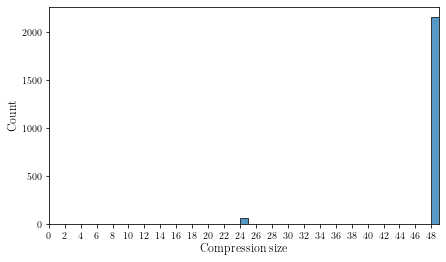

In [106]:
# class_compressions = list(map(len, generated_states))
# plot_histo(class_compressions, f'imgs/dataset_visualizations/all_{X_MOVES}_moves_class_sizes_histo_{DOUBLE_MOVES_NAME}')

class_compressions = x_moves_dataset.groupby('class_id').size()
print(class_compressions)
plot_histo(class_compressions, f'imgs/dataset_visualizations/all_{X_MOVES}_moves_class_sizes_histo_{DOUBLE_MOVES_NAME}')

### Plotting the symmetry compressions per distance from goal

1 move(s) from goal


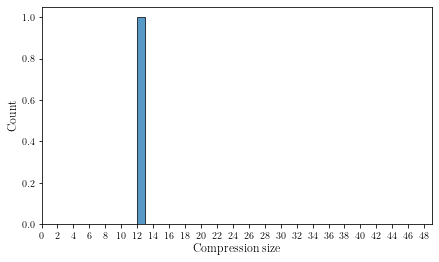


2 move(s) from goal


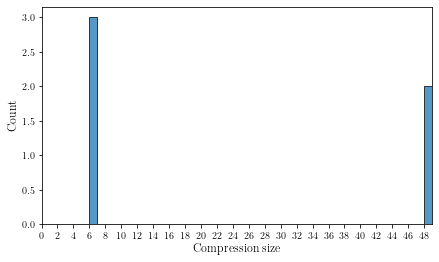


3 move(s) from goal


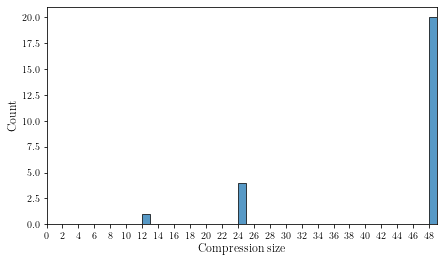


4 move(s) from goal


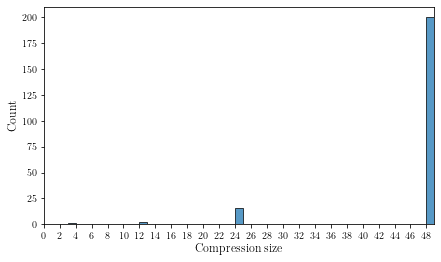


5 move(s) from goal


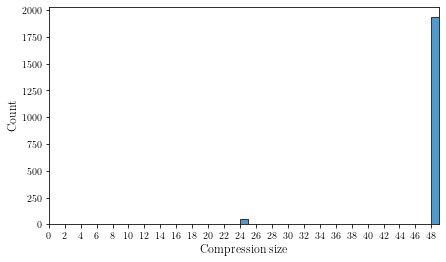

In [107]:
# for move_nr in range(1, X_MOVES + 1):
#     filtered_gen_states = np.array(generated_states, dtype=object)[(np.array(list(map(lambda x: x[1], state_classes_list)), dtype=object) == int(move_nr))]
#     print(f'{move_nr} move(s) from goal')
#     filtered_class_compressions = list(map(len, filtered_gen_states))
#     plot_histo(filtered_class_compressions, f'imgs/dataset_visualizations/{move_nr}moves_class_sizes_histo_{DOUBLE_MOVES_NAME}.png')
#     print()

for move_nr in range(1, X_MOVES + 1):
    filtered_x_moves_dataset = x_moves_dataset[x_moves_dataset['distance'] == move_nr]
    print(f'{move_nr} move(s) from goal')
    filtered_class_compressions = filtered_x_moves_dataset.groupby('class_id').size()
    plot_histo(filtered_class_compressions, f'imgs/dataset_visualizations/{move_nr}moves_class_sizes_histo_{DOUBLE_MOVES_NAME}')
    print()

---

## 3. Construct states (and their symmetry-equivalent counterparts) from Kociemba's optimally solved dataset

In [7]:
import re

In [8]:
generators_kociemba, distances_kociemba = [], []

with open('data/kociemba100000optcubes.txt', 'r') as f:
    for i, line in tqdm(enumerate(f)):
        line = line.strip()
        generator_str, distance_raw = line.split('  ')
        distance = int(re.findall(r'\d+', distance_raw)[0])
        generator_str = re.sub(r"([A-Z])2(\')?", r"\1\2 \1\2", generator_str)
        generator = generator_str.split()
        
        generators_kociemba.append(generator)
        distances_kociemba.append(distance)

100000it [00:04, 22883.46it/s]


In [30]:
np.random.seed(42)
KOCIEMBAS_SIZE = 10000
randomly_chosen = np.random.choice(len(distances_kociemba), size=KOCIEMBAS_SIZE, replace=False)
generators_kociemba_subset = np.array(generators_kociemba)[randomly_chosen]
distances_kociemba_subset = np.array(distances_kociemba)[randomly_chosen]
print(distances_kociemba_subset)

[18 18 18 ... 16 18 18]


<ipython-input-30-f29ac550f956>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  generators_kociemba_subset = np.array(generators_kociemba)[randomly_chosen]


In [31]:
generated_states_kociemba, state_classes_list_kociemba, state2gen_dict_kociemba = generate_symmetric_cubes(generators_kociemba_subset, cube_gens_lengths=distances_kociemba_subset)
print(generated_states_kociemba[0][0].colors)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [9:28:14<00:00,  3.41s/it]

[24 14 33 10  4 12 38 16 47 44 52 18 34 13 19 51 23  6 20 50 36 28 22 48
  9 32 11 53  5 35  1 31 30 27 25  0 17 46 26 37 40 39  2  3 15 42  7 45
 43 49 21 29 41  8]


In [22]:
print(len([cls_lis[1] for cls_lis in state_classes_list_kociemba for state in cls_lis[0]]))

4800


In [23]:
kociemba_dataset = pd.DataFrame({
    'state': [state for cls_list in generated_states_kociemba for state in cls_list],
    'colors': [ids_to_color(state.colors) for cls_list in generated_states_kociemba for state in cls_list],
    'class_id': [i for i, cls_list in enumerate(generated_states_kociemba) for _ in cls_list],
    'distance': [cls_list[1] for cls_list in state_classes_list_kociemba for _ in cls_list[0]],
    'generator': [state2gen_dict_kociemba[" ".join(map(str, ids_to_color(state.colors)))] for cls_list in generated_states_kociemba for state in cls_list]
})
display(kociemba_dataset.head())

,state,colors,class_id,distance,generator
0,<classes.cube_classes.Cube3State object at 0x0...,"[2, 1, 3, 1, 0, 1, 4, 1, 5, 4, 5, 2, 3, 1, 2, ...",0,18,"[[R', D, L, L, D', L, L, U, R, R, B, L, L, R, ..."
1,<classes.cube_classes.Cube3State object at 0x0...,"[2, 1, 0, 1, 0, 5, 2, 5, 4, 1, 3, 5, 0, 1, 3, ...",0,18,"[[D', L, U, U, L', U, U, R, D, D, B, U, U, D, ..."
2,<classes.cube_classes.Cube3State object at 0x0...,"[1, 3, 5, 3, 0, 2, 3, 5, 4, 5, 0, 4, 0, 1, 0, ...",0,18,"[[L', U, R, R, U', R, R, D, L, L, B, R, R, L, ..."
3,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 2, 2, 0, 1, 5, 2, 0, 4, 5, 3, 5, 1, 0, ...",0,18,"[[U', R, D, D, R', D, D, L, U, U, B, D, D, U, ..."
4,<classes.cube_classes.Cube3State object at 0x0...,"[1, 4, 0, 1, 0, 2, 3, 1, 4, 5, 4, 4, 1, 1, 1, ...",0,18,"[[R', B, L, L, B', L, L, F, R, R, U, L, L, R, ..."


In [24]:
dataset = kociemba_dataset['colors'].tolist()
targets = kociemba_dataset['distance'].tolist()
classes = kociemba_dataset['class_id'].tolist()
dataset_size = len(kociemba_dataset.index)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    dataset, classes, stratify=classes, test_size=int(round(1 * dataset_size / 48)),
    random_state=0
)

In [26]:
# display(kociemba_dataset.head(48))
class_curr = 1
print(np.array(x_train)[np.array(y_train)==class_curr][0])
print(len(np.array(x_train)[np.array(y_train)==class_curr]))
print(np.array(x_test)[np.array(y_test)==class_curr][0])
print(len(np.array(x_test)[np.array(y_test)==class_curr]))

[1 1 4 4 0 0 5 4 4 2 4 0 0 1 5 0 5 1 0 4 1 0 2 2 4 2 3 5 3 0 2 3 1 5 3 1 2
 5 2 5 4 3 4 3 3 3 0 5 1 5 2 2 1 3]
47
[2 3 1 3 0 1 3 0 3 0 2 1 3 1 2 4 0 0 5 0 2 1 2 4 4 1 5 4 2 4 2 3 5 3 5 5 0
 3 1 0 4 4 3 4 5 2 5 0 4 5 1 2 5 1]
1


In [27]:
kociemba_dataset.to_pickle(f'data/processed/kociemba{KOCIEMBAS_SIZE}_dataset.pkl')

In [28]:
print(len(kociemba_dataset.index))

4800


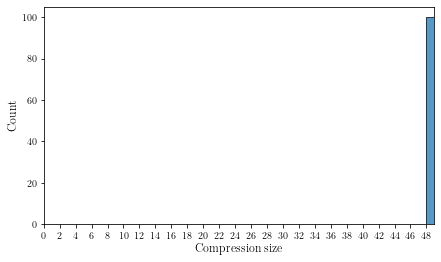

In [29]:
class_compressions_kociemba = list(map(len, generated_states_kociemba))
plot_histo(class_compressions_kociemba, f'imgs/dataset_visualizations/kociemba/all_kociemba{KOCIEMBAS_SIZE}_class_sizes_histo.png')

----

## 4. Generate my own random states

In [ ]:
N_RANDOM_STATES = 10000

In [ ]:
states, scramble_nums, random_gens = generate_random_states_and_generators(N_RANDOM_STATES, (1, 24))
print(len(random_gens))
random_gens = list(set(map(tuple, random_gens)))
random_gens = sorted(random_gens, key=lambda x: len(x))
print(len(random_gens))

10000
9242


In [ ]:
generated_rnd_states, state_classes_rnd_list, state2gen_rnd_dict = generate_symmetric_cubes(random_gens)
print(generated_rnd_states[0][0].colors)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9242/9242 [2:50:13<00:00,  1.11s/it]

[ 0  1  2  3  4  5  6  7  8 11 14 17 10 13 16  9 12 15 45 19 20 48 22 23
 51 25 26 36 28 29 39 31 32 42 34 35 18 37 38 21 40 41 24 43 44 27 46 47
 30 49 50 33 52 53]


In [ ]:
rnd_moves_dataset = pd.DataFrame({
    'state': [state for cls_list in generated_rnd_states for state in cls_list],
    'colors': [ids_to_color(state.colors) for cls_list in generated_rnd_states for state in cls_list],
    'class_id': [i for i, cls_list in enumerate(generated_rnd_states) for _ in cls_list],
    'distance': [None for cls_list in state_classes_rnd_list for _ in cls_list[0]],
    'generator': [state2gen_rnd_dict[" ".join(map(str, ids_to_color(state.colors)))] for cls_list in generated_rnd_states for state in cls_list]
})
display(rnd_moves_dataset.head())

,state,colors,class_id,distance,generator
0,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,None,[[D]]
1,<classes.cube_classes.Cube3State object at 0x0...,"[5, 5, 5, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, ...",0,None,[[L]]
2,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0,None,[[U]]
3,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 1, 1, 1, ...",0,None,[[R]]
4,<classes.cube_classes.Cube3State object at 0x0...,"[3, 0, 0, 3, 0, 0, 3, 0, 0, 1, 1, 2, 1, 1, 2, ...",0,None,[[B]]


In [ ]:
display(rnd_moves_dataset[rnd_moves_dataset['state'] == zero_state])
rnd_moves_dataset = rnd_moves_dataset.drop(rnd_moves_dataset[rnd_moves_dataset['state'] == zero_state].index)
display(rnd_moves_dataset[rnd_moves_dataset['state'] == zero_state])

,state,colors,class_id,distance,generator
126,<classes.cube_classes.Cube3State object at 0x0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",6,None,"[[F', F]]"


,state,colors,class_id,distance,generator


In [ ]:
rnd_moves_dataset.to_pickle(f'data/processed/rand{N_RANDOM_STATES}_moves_dataset.pkl')

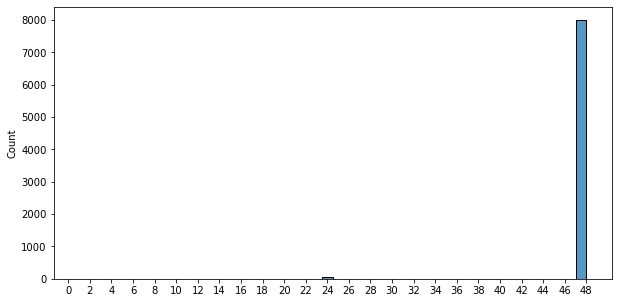

In [ ]:
class_compressions = list(map(len, generated_rnd_states))
plot_histo(class_compressions, f'imgs/dataset_visualizations/rand{N_RANDOM_STATES}_class_sizes_histo.png')